In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import re
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split as tts
import torch
import collections
from collections import Counter
from torch import nn
from torch.utils.data import Dataset, DataLoader
from bs4 import BeautifulSoup
import math
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install datasets
import datasets
import pandas as pd
from datasets import load_from_disk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.8 MB/s eta 0:00:00


In [ ]:
tokenized_dataset_train = load_from_disk("/content/drive/MyDrive/T5small_train_tokenized")
tokenized_dataset_test = load_from_disk("/content/drive/MyDrive/T5small_test_tokenized")

In [ ]:
train_data = pd.DataFrame({'Text' : tokenized_dataset_train['text'], 'Summary' : tokenized_dataset_train['headline']})
train_data

,Text,Summary
0,"If you're a photographer, keep all the necessa...",Keep related supplies in the same area.\nMake ...
1,See the image for how this drawing develops st...,Create a sketch in the NeoPopRealist manner of...
2,It is possible to become a VFX artist without ...,Get a bachelor’s degree.\nEnroll in a studio-b...
3,The best art investors do their research on th...,Start with some experience or interest in art....
4,"As you start planning for a project or work, y...","Keep your reference materials, sketches, artic..."
...,...,...
19995,"Deep muscle techniques like Neuromuscular, Rol...",Get a massage.\nUse a hot tub or sauna.\nConsi...
19996,Start every morning by getting out of bed and ...,Touch your toes.\nDo the bridge.\nDo a cobra p...
19997,"If you have a friend to stretch with you, luck...",Find a friend to stretch with.\nDo some basic ...
19998,You will need to stretch daily to achieve it a...,Believe in yourself and believe you can do it....


In [ ]:
word_mapping = {"ain't": "is not","aint": "is not", "aren't": "are not","arent": "are not","can't": "cannot","cant": "cannot", "'cause": "because", "cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", 'mstake':"mistake",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not",'wasnt':"was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have", 'youve':"you have", 'goin':"going", '4ward':"forward", "shant":"shall not",'tat':"that", 'u':"you", 'v': "we",'b4':'before', "sayin'":"saying"
                      }

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))
def text_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([word_mapping[t] if t in word_mapping else t for t in newString.split(" ")])
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString)
    tokens = [w for w in newString.split() if not w in stop_words]
    long_words=[]

    tokens = [w for w in newString.split() if not w in stop_words]
    long_words=[]
    for i in tokens:
        if len(i)>3:                  #removing short word
            long_words.append(i)
    text = " ".join(long_words).strip()
    def no_space(word, prev_word):
        return word in set(',!"";.''?') and prev_word!=" "
    text = text.replace('\u202f', ' ').replace('\xa0', ' ').lower()
    out = [' ' + char if i > 0 and no_space(char, text[i - 1]) else char for i, char in enumerate(text)]
    text = ''.join(out)
    return text

train_data['cleaned_text'] = train_data['Text'].apply(text_cleaner)
train_data['cleaned_summary'] = train_data['Summary'].apply(text_cleaner)
# this step is to remove all rows that have a blank summary
train_data["cleaned_summary"].replace('', np.nan, inplace=True)
train_data.dropna(axis=0, inplace=True)

In [ ]:
text_count = []
for i in train_data['cleaned_text']:
  text_count.append(len(nltk.word_tokenize(i)))

summary_count = []
for i in train_data['cleaned_summary']:
  summary_count.append(len(nltk.word_tokenize(i)))

In [ ]:
import matplotlib.pyplot as plt

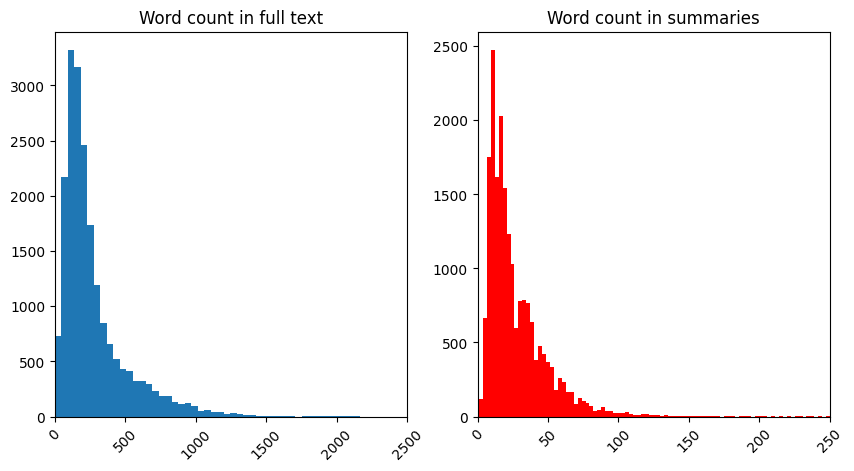

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(text_count, bins=100)
ax[0].set_title('Word count in full text')
ax[0].set_xlim(0, 2500)
ax[0].tick_params(axis='x', rotation=45)

ax[1].hist(summary_count, bins=100, color = 'red')
ax[1].set_title('Word count in summaries')
ax[1].set_xlim(0, 250)
ax[1].tick_params(axis='x', rotation=45)

plt.show()

In [ ]:
# Number of texts below 1000 tokens
sum = 0
for i in text_count:
  if i < 1000:
    sum += 1
print(f' Percentage of texts under 1000 tokens {sum/len(text_count)*100}')

# Number of summaries below 100 tokens
sum = 0
for i in summary_count:
  if i < 100:
    sum += 1
print(f' Percentage of summaries under 100 tokens {sum/len(summary_count)*100}')


 Percentage of texts under 1000 tokens 98.0998099809981
 Percentage of summaries under 100 tokens 98.68486848684869


In [ ]:
# Using max tokens as 1000 for texts and 100 for summaries

In [ ]:
max_len_text=1000
max_len_summary=100

In [ ]:
test_data = pd.DataFrame({'Text' : tokenized_dataset_test['text'], 'Summary' : tokenized_dataset_test['headline']})
test_data

,Text,Summary
0,"Caged animals such as hamsters, guinea pigs, r...",Relocate your caged pet.\nChoose an environmen...
1,Every boarding barn has people who go on vacat...,Horse-sit.\nHire yourself out as a groomer.\nT...
2,Let him know that you like him by making an ef...,Pay attention to your appearance.\nShow him ho...
3,It can be hard to tell if someone is intereste...,Read the signs.\nInvite him along on a group a...
4,Your crush may be the prettiest person in the ...,Get to know your crush a bit.\nHang out in per...
...,...,...
5572,";\n, If you're having trouble with the seatbel...",Find someone you feel comfortable with to go o...
5573,Listen for the click or other sound it makes w...,"Double check your harness, bar or other restra..."
5574,Each class corresponds to a letter of the alph...,Learn the 20 classifications the Library of Co...
5575,Brake pads and brake shoes are different from ...,Learn the difference between brake pads and br...


In [ ]:
test_data['cleaned_text'] = test_data['Text'].apply(text_cleaner)
test_data['cleaned_summary'] = test_data['Summary'].apply(text_cleaner)
# this step is to remove all rows that have a blank summary
test_data["cleaned_summary"].replace('', np.nan, inplace=True)
test_data.dropna(axis=0, inplace=True)

In [ ]:
x_train,x_test,y_train,y_test = train_data['cleaned_text'],test_data['cleaned_text'],train_data['cleaned_summary'],test_data['cleaned_summary']

In [ ]:
# Tokenize function
def tokenize(lines, token='word'):
    assert token in ('word', 'char'), 'Unknown token type: ' + token
    return [line.split() if token == 'word' else list(line) for line in lines]

# pading function
def truncate_pad(line, num_steps, padding_token):
    if len(line) > num_steps:
        return line[:num_steps]  # Truncate
    return line + [padding_token] * (num_steps - len(line))  # Pad

# the vocabulary class
class Vocab:
    def __init__(self, tokens=[], min_freq=0, reserved_tokens=[]):
        # Flatten a 2D list if needed
        if tokens and isinstance(tokens[0], list):
            tokens = [token for line in tokens for token in line]
        # Count token frequencies
        counter = collections.Counter(tokens)
        self.token_freqs = sorted(counter.items(), key=lambda x: x[1],
                                  reverse=True)
        # The list of unique tokens
        self.idx_to_token = list(sorted(set(['<unk>'] + reserved_tokens + [
            token for token, freq in self.token_freqs if freq >= min_freq])))
        self.token_to_idx = {token: idx
                             for idx, token in enumerate(self.idx_to_token)}

    def __len__(self):
        return len(self.idx_to_token)

    def __getitem__(self, tokens):
        if not isinstance(tokens, (list, tuple)):
            return self.token_to_idx.get(tokens, self.unk)
        return [self.__getitem__(token) for token in tokens]

    def to_tokens(self, indices):
        if hasattr(indices, '__len__') and len(indices) > 1:
            return [self.idx_to_token[int(index)] for index in indices]
        return self.idx_to_token[indices]

    def unk(self):  # Index for the unknown token
        return self.token_to_idx['<unk>']
# tokenize
src_tokens = tokenize(x_train)
tgt_tokens = tokenize(y_train)
# build vocabulary on dataset
src_vocab = Vocab(src_tokens, reserved_tokens=['<pad>', '<bos>', '<eos>'])
tgt_vocab = Vocab(tgt_tokens, reserved_tokens=['<pad>', '<bos>', '<eos>'])

In [ ]:
# fn to add eos and padding and also determine valid length of each data sample
def build_array_sum(lines, vocab, num_steps):
    lines = [vocab[l] for l in lines]
    lines = [l + [vocab['<eos>']] for l in lines]
    array = torch.tensor([truncate_pad(l, num_steps, vocab['<pad>']) for l in lines])
    valid_len = (array != vocab['<pad>']).type(torch.int32).sum(1)
    return array, valid_len

src_array, src_valid_len = build_array_sum(src_tokens, src_vocab, max_len_text)
tgt_array, tgt_valid_len = build_array_sum(tgt_tokens, tgt_vocab, max_len_summary)
data_arrays = (src_array, src_valid_len, tgt_array, tgt_valid_len)


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device:', device)

Device: cuda


In [ ]:
# create the tensor dataset object
def load_array(data_arrays, batch_size, is_train=True):
    dataset = torch.utils.data.TensorDataset(*data_arrays)
    return torch.utils.data.DataLoader(dataset, batch_size, shuffle=is_train)
batch_size = 64
data_iter = load_array(data_arrays, batch_size)

In [ ]:
# The main class
class MultiHeadAttention(nn.Module):
    def __init__(self, key_size, query_size, value_size, num_hiddens, num_heads, dropout, bias=False, **kwargs):
        super(MultiHeadAttention, self).__init__(**kwargs)
        self.num_heads = num_heads
        self.attention = DotProductAttention(dropout)
        self.w_q = nn.Linear(query_size, num_hiddens, bias=bias)
        self.w_k = nn.Linear(key_size, num_hiddens, bias=bias)
        self.w_v = nn.Linear(value_size, num_hiddens, bias=bias)
        self.w_o = nn.Linear(num_hiddens, num_hiddens, bias=bias)
    def forward(self, queries, keys, values, valid_lens):
        queries = transpose_qkv(self.w_q(queries), self.num_heads)
        keys = transpose_qkv(self.w_k(keys), self.num_heads)
        values = transpose_qkv(self.w_v(values), self.num_heads)
        if valid_lens is not None:
            valid_lens = torch.repeat_interleave(valid_lens, repeats = self.num_heads, dim=0)
        output = self.attention(queries, keys, values, valid_lens)
        output_concat = transpose_output(output, self.num_heads)
        return self.w_o(output_concat)

# Function to transpose the linearly transformed query key and values
def transpose_qkv(X, num_heads):
    X = X.reshape(X.shape[0], X.shape[1], num_heads, -1)
    X = X.permute(0, 2, 1, 3)
    return X.reshape(-1, X.shape[2], X.shape[3])

# For output formatting
def transpose_output(X, num_heads):
    X = X.reshape(-1, num_heads, X.shape[1], X.shape[2])
    X = X.permute(0, 2, 1, 3)
    return X.reshape(X.shape[0], X.shape[1], -1)

# The dot product attention scoring function
class DotProductAttention(nn.Module):
    def __init__(self, dropout, **kwargs):
        super(DotProductAttention, self).__init__(**kwargs)
        self.dropout = nn.Dropout(dropout)
    def forward(self, queries, keys, values, valid_lens=None):
        d = queries.shape[-1]
        scores = torch.bmm(queries, keys.transpose(1, 2))/math.sqrt(d)
        self.attention_weights = masked_softmax(scores, valid_lens)
        return torch.bmm(self.dropout(self.attention_weights), values)
# Here masking is used so that irrelevant padding tokens are not considered
# while calculations

def sequence_mask(X, valid_len, value=0):
    maxlen = X.size(1)
    mask = torch.arange((maxlen), dtype=torch.float32, device = valid_len.device)[None, :] < valid_len[:, None]    #device=X.device
    X[~mask] = value
    return X
# the irrelevant tokens are given a very small negative value which gets
# ignored in the subsequent calculations
def masked_softmax(X, valid_lens):
    if valid_lens is None:
        return nn.functional.softmax(X, dim=-1)
    else:
        shape = X.shape
        if valid_lens.dim() == 1:
            valid_lens = torch.repeat_interleave(valid_lens, shape[1])
        else:
            valid_lens = valid_lens.reshape(-1)
        X = sequence_mask(X.reshape(-1, shape[-1]), valid_lens, value=-1e6)
        return nn.functional.softmax(X.reshape(shape), dim=-1)


In [ ]:
class AddNorm(nn.Module):
    def __init__(self, normalized_shape, dropout=0.0):
        super(AddNorm, self).__init__()
        self.norm = nn.LayerNorm(normalized_shape)
        self.dropout = nn.Dropout(dropout)

    def forward(self, X, Y):
        # Apply layer normalization and add the original input (residual connection)
        return X + self.dropout(self.norm(Y))


In [ ]:
class PositionWiseFFN(nn.Module):
    def __init__(self, ffn_num_input, ffn_num_hiddens, ffn_num_output, **kwargs):
        super(PositionWiseFFN, self).__init__(**kwargs)
        self.dense1 = nn.Linear(ffn_num_input, ffn_num_hiddens)
        self.relu = nn.ReLU()
        self.dense2 = nn.Linear(ffn_num_hiddens, ffn_num_output)
    def forward(self, X):
        return self.dense2(self.relu(self.dense1(X)))

In [ ]:
class PositionalEncoding(nn.Module):
    def __init__(self, num_hiddens, dropout, max_len=1000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(dropout)
        self.P = torch.zeros((1, max_len, num_hiddens))
        X = torch.arange(max_len, dtype=torch.float32).reshape(-1, 1)/torch.pow(10000,torch.arange(0, num_hiddens,2, dtype=torch.float32)/num_hiddens)
        self.P[:,:, 0::2] = torch.sin(X)
        self.P[:, :, 1::2] = torch.cos(X)

    def forward(self, X):
        X = X + self.P[:, :X.shape[1], :].to(X.device)
        return self.dropout(X)

In [ ]:
# class for the block structure within
class EncoderBlock(nn.Module):
    def __init__(self, key_size, query_size, value_size, num_hiddens, norm_shape, ffn_num_input,
                 ffn_num_hiddens, num_heads, dropout, use_bias=False, **kwargs):
        super(EncoderBlock, self).__init__(**kwargs)
        self.attention = MultiHeadAttention(key_size, query_size, value_size, num_hiddens,num_heads, dropout, use_bias)
        self.addnorm1 = AddNorm(norm_shape, dropout)
        self.ffn = PositionWiseFFN(ffn_num_input, ffn_num_hiddens, num_hiddens)
        self.addnorm2 = AddNorm(norm_shape, dropout)

    def forward(self, X, valid_lens):
        Y = self.addnorm1(X, self.attention(X, X, X, valid_lens))
        return self.addnorm2(Y, self.ffn(Y))

# the main encoder class
class TransformerEncoder(nn.Module):
    def __init__(self, vocab_size, key_size, query_size, value_size, num_hiddens, norm_shape, ffn_num_input, ffn_num_hiddens, num_heads, num_layers, dropout, use_bias=False, **kwargs):
        super(TransformerEncoder, self).__init__(**kwargs)
        self.num_hiddens = num_hiddens
        self.embedding = nn.Embedding(vocab_size, num_hiddens)
        self.pos_encoding = PositionalEncoding(num_hiddens, dropout)
        self.blks = nn.Sequential()
        for i in range(num_layers):
            self.blks.add_module("block"+str(i),EncoderBlock(key_size, query_size, value_size, num_hiddens, norm_shape, ffn_num_input, ffn_num_hiddens, num_heads, dropout, use_bias))

    def forward(self, X, valid_lens, *args):
        X = self.pos_encoding(self.embedding(X)*math.sqrt(self.num_hiddens))
        self.attention_weights = [None]*len(self.blks)
        for i, blk in enumerate(self.blks):
            X = blk(X, valid_lens)
            self.attention_weights[i] = blk.attention.attention.attention_weights
        return X

    # for param in encoder.parameters():
    #   if len(param.shape) > 1:
    #       nn.init.xavier_uniform_(param)

In [ ]:
class DecoderBlock(nn.Module):
    def __init__(self, key_size, query_size, value_size, num_hiddens, norm_shape,
                 ffn_num_input, ffn_num_hiddens, num_heads, dropout, i, **kwargs):
        super(DecoderBlock, self).__init__(**kwargs)
        self.i = i
        self.attention1 = MultiHeadAttention(key_size, query_size, value_size, num_hiddens, num_heads, dropout)
        self.addnorm1 = AddNorm(norm_shape, dropout)
        self.attention2 = MultiHeadAttention(key_size, query_size, value_size, num_hiddens, num_heads, dropout)
        self.addnorm2 = AddNorm(norm_shape, dropout)
        self.ffn = PositionWiseFFN(ffn_num_input, ffn_num_hiddens, num_hiddens)
        self.addnorm3 = AddNorm(norm_shape, dropout)

    def forward(self, X, state):
        enc_outputs, enc_valid_lens = state[0], state[1]
        if state[2][self.i] is None: # true when training the model
            key_values = X
        else:                        # while decoding state[2][self.i] is decoded output of the ith block till the present time-step
            key_values = torch.cat((state[2][self.i], X), axis=1)
        state[2][self.i] = key_values
        if self.training:
            batch_size, num_steps, _ = X.shape
            dec_valid_lens = torch.arange(1, num_steps+1, device = X.device).repeat(batch_size, 1)
        else:
            dec_valid_lens = None
        X2 = self.attention1(X, key_values, key_values, dec_valid_lens)
        Y = self.addnorm1(X, X2)
        Y2 = self.attention2(Y, enc_outputs, enc_outputs, enc_valid_lens)
        Z = self.addnorm2(Y, Y2)
        return self.addnorm3(Z, self.ffn(Z)), state

# The main decoder class
class TransformerDecoder(nn.Module):
    def __init__(self, vocab_size, key_size, query_size, value_size, num_hiddens,
                 norm_shape, ffn_num_input, ffn_num_hiddens, num_heads, num_layers, dropout, **kwargs):
        super(TransformerDecoder, self).__init__(**kwargs)
        self.num_hiddens = num_hiddens
        self.num_layers = num_layers
        self.embedding = nn.Embedding(vocab_size, num_hiddens)
        self.pos_encoding = PositionalEncoding(num_hiddens, dropout)
        self.blks = nn.Sequential()
        for i in range(num_layers):
            self.blks.add_module("block"+str(i),
                                DecoderBlock(key_size, query_size, value_size,
                                             num_hiddens, norm_shape, ffn_num_input, ffn_num_hiddens, num_heads, dropout, i))
            self.dense = nn.Linear(num_hiddens, vocab_size)

    def init_state(self, enc_outputs, enc_valid_lens, *args):
        return [enc_outputs, enc_valid_lens, [None]*self.num_layers]

    def forward(self, X, state):
        X = self.pos_encoding(self.embedding(X)*math.sqrt(self.num_hiddens))
        self._attention_weights = [[None]*len(self.blks) for _ in range(2)]
        for i, blk in enumerate(self.blks):
            X, state = blk(X, state)
            self._attention_weights[0][i] = blk.attention1.attention.attention_weights
            self._attention_weights[1][i] = blk.attention2.attention.attention_weights
        return self.dense(X), state

    def attention_weights(self):
        return self._attention_weights

    # for param in decoder.parameters():
    #   if len(param.shape) > 1:
    #       nn.init.xavier_uniform_(param)

In [ ]:
class Transformer(nn.Module):
    def __init__(self, encoder, decoder):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, enc_X, dec_X, *args):
        enc_all_outputs = self.encoder(enc_X, *args)
        dec_state = self.decoder.init_state(enc_all_outputs, *args)
        # Return decoder output only
        return self.decoder(dec_X, dec_state)[0]

In [ ]:
num_hiddens, num_layers, dropout, num_steps = 32, 2, 0.1, 10
ffn_num_input, ffn_num_hiddens, num_heads = 32, 64, 4
key_size, query_size, value_size = 32, 32, 32
norm_shape = [32]
encoder = TransformerEncoder(len(src_vocab), key_size, query_size, value_size, num_hiddens,norm_shape, ffn_num_input, ffn_num_hiddens, num_heads,num_layers, dropout)
decoder = TransformerDecoder(len(tgt_vocab), key_size, query_size, value_size, num_hiddens,norm_shape, ffn_num_input, ffn_num_hiddens, num_heads,num_layers, dropout)
net = Transformer(encoder, decoder)

# Initialize weights for the entire Transformer model
for param in net.parameters():
    if len(param.shape) > 1:
        nn.init.xavier_uniform_(param)


In [ ]:
# def grad_clipping(net, theta):
#     if isinstance(net, nn.Module):
#         params = [p for p in net.parameters() if p.requires_grad]
#     else:
#         params = net.params
#     norm = torch.sqrt(sum(torch.sum(p.grad ** 2)) for p in params))
#     if norm > theta:
#         for param in params:
#             param.grad[:] *= theta / norm

# def grad_clipping(net, theta):
#     if isinstance(net, nn.Module):
#         params = [p for p in net.parameters() if p.requires_grad]
#     else:
#         params = net.params if hasattr(net, 'params') else []
#     norm = torch.sqrt(sum(torch.sum(p.grad ** 2) for p in params))
#     if norm > theta:
#         for param in params:
#             param.grad[:] *= theta / norm

# def grad_clipping(net, theta):
#     if isinstance(net, nn.Module):
#         params = [p for p in net.parameters() if p.requires_grad]
#     else:
#         params = []
#         if hasattr(net, 'params'):
#             params = [p for p in net.params if p.requires_grad]
#     norm = torch.sqrt(sum(torch.sum(p.grad ** 2) for p in params))
#     if norm > theta:
#         for param in params:
#             param.grad[:] *= theta / norm

# def grad_clipping(net, theta):
#     if isinstance(net, nn.Module):
#         params = [p for p in net.parameters() if p.requires_grad]
#     else:
#         params = []
#         if hasattr(net, 'params'):
#             params = [p for p in net.params if p.requires_grad]
#     norm = torch.sqrt(sum(torch.sum(param.grad ** 2) for param in params))
#     if norm > theta:
#         for param in params:
#             param.grad[:] *= theta / norm

def grad_clipping(net, theta):
    if isinstance(net, nn.Module):
        params = [p for p in net.parameters() if p.requires_grad]
    else:
        params = []
        if hasattr(net, 'params'):
            params = [p for p in net.params if p.requires_grad]
    norm = torch.sqrt(sum(torch.sum(p.grad ** 2) for p in params))
    if norm > theta:
        for param in params:
            param.grad.data *= theta / norm






In [ ]:
class Accumulator:
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [ ]:
class MaskedSoftmaxCELoss(nn.CrossEntropyLoss):
    # `pred` shape: (`batch_size`, `num_steps`, `vocab_size`)
    # `label` shape: (`batch_size`, `num_steps`)
    # `valid_len` shape: (`batch_size`,)
    def forward(self, pred, label, valid_len):
        weights = torch.ones_like(label)
        weights = sequence_mask(weights, valid_len)
        self.reduction='none'
        unweighted_loss = super(MaskedSoftmaxCELoss, self).forward(pred.permute(0, 2, 1), label)
        weighted_loss = (unweighted_loss * weights).mean(dim=1)
        return weighted_loss

In [ ]:
def get_device(i=0):
    if torch.cuda.device_count() >= i+1:
        return torch.device(f'cuda:{i}')
    else:
        return torch.device('cpu')
device = get_device()

In [ ]:
device

device(type='cuda', index=0)

In [ ]:
loss_list = []
def train_seq2seq(net, data_iter, lr, num_epochs, tgt_vocab, device):
    net.to(device)
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)
    loss = MaskedSoftmaxCELoss()
    net.train()
    for epoch in range(num_epochs):
        metric = Accumulator(2)  # Sum of training loss, no. of tokens
        for batch in data_iter:
            optimizer.zero_grad()
            X, X_valid_len, Y, Y_valid_len = [x.to(device) for x in batch]
            bos = torch.tensor([tgt_vocab['<bos>']] * Y.shape[0],device=device).reshape(-1, 1)
            dec_input = torch.cat([bos, Y[:, :-1]], 1)  # Teacher forcing
            Y_hat = net(X, dec_input, X_valid_len)
            l = loss(Y_hat, Y, Y_valid_len)
            l.sum().backward()  # Make the loss scalar for `backward`
            #grad_clipping(net, 1)
            num_tokens = Y_valid_len.sum()
            optimizer.step()
            with torch.no_grad():
                metric.add(l.sum(), num_tokens)
        print(f"Done with epoch number: {epoch+1}") # optional step
        print(f'loss {metric[0] / metric[1]:.3f} on {str(device)}')
        loss_list.append(metric[0] / metric[1])

In [ ]:
lr = 0.005
num_epochs = 10
train_seq2seq(net, data_iter, lr, num_epochs, tgt_vocab,device)

Done with epoch number: 1
loss 0.078 on cuda:0
Done with epoch number: 2
loss 0.069 on cuda:0
Done with epoch number: 3
loss 0.065 on cuda:0
Done with epoch number: 4
loss 0.062 on cuda:0
Done with epoch number: 5
loss 0.060 on cuda:0
Done with epoch number: 6
loss 0.058 on cuda:0
Done with epoch number: 7
loss 0.056 on cuda:0
Done with epoch number: 8
loss 0.055 on cuda:0
Done with epoch number: 9
loss 0.054 on cuda:0
Done with epoch number: 10
loss 0.054 on cuda:0


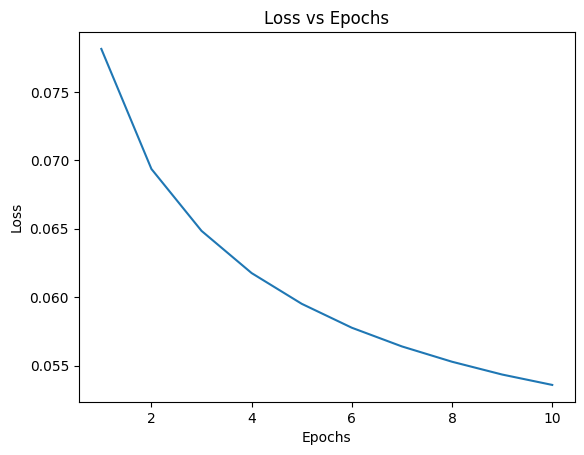

In [ ]:
import matplotlib.pyplot as plt

epoch_num = [1,2,3,4,5,6,7,8,9,10]
loss = loss_list
plt.plot(epoch_num, loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

In [ ]:
torch.save(net, '/content/drive/MyDrive/Models/wikihow_seq2seq')

In [ ]:
def predict_seq2seq(net, src_sentence, src_vocab, tgt_vocab, num_steps,device, save_attention_weights=False):
    # Set `net` to eval mode for inference
    net.eval()
    src_tokens = src_vocab[src_sentence.lower().split(' ')] + [src_vocab['<eos>']]
    enc_valid_len = torch.tensor([len(src_tokens)], device=device)
    src_tokens = truncate_pad(src_tokens, num_steps, src_vocab['<pad>'])
    # Unsqueeze adds another dimension that works as the the batch axis here
    enc_X = torch.unsqueeze(torch.tensor(src_tokens, dtype=torch.long, device=device), dim=0)
    # enc_X = torch.tensor(src_tokens, dtype=torch.long, device=device)[None, :]

    enc_outputs = net.encoder(enc_X, enc_valid_len)
    dec_state = net.decoder.init_state(enc_outputs, enc_valid_len)
    # Add the batch axis to the decoder now
    dec_X = torch.unsqueeze(torch.tensor([tgt_vocab['<bos>']], dtype=torch.long, device=device), dim=0)
    output_seq, attention_weight_seq = [], []
    for _ in range(num_steps):
        Y = net.decoder(dec_X, dec_state)[0]
        # We use the token with the highest prediction likelihood as the input
        # of the decoder at the next time step
        dec_X = Y.argmax(dim=2)
        pred = dec_X.squeeze(dim=0).type(torch.int32).item()
        # Save attention weights
        if save_attention_weights:
            attention_weight_seq.append(net.decoder.attention_weights)
            # Once the end-of-sequence token is predicted, the generation of the output sequence is complete
        if pred == tgt_vocab['<eos>']:
                break
        output_seq.append(pred)
    if len(output_seq)<2:

        if len(output_seq)==1:
            return ''.join(tgt_vocab.to_tokens(output_seq[0])), attention_weight_seq
        else:

            return "No output!", attention_weight_seq
    else:
        return ' '.join(tgt_vocab.to_tokens(output_seq)), attention_weight_seq

In [ ]:
import torch

In [ ]:
sample = list(x_test)
errors_idx = []
i =0
predictions = []
for s in sample:
  try:
    pred_sum, _ = predict_seq2seq(net, s, src_vocab, tgt_vocab, 10, device)
    predictions.append(pred_sum)
  except:
    errors_idx.append(i)
    predictions.append("No Output!")
  i += 1

In [ ]:
import pandas as pd
dataset = pd.DataFrame()

In [ ]:
from datasets import load_from_disk
tokenized_dataset_test = load_from_disk("/content/drive/MyDrive/wikihow_data/T5small_test_tokenized")

In [ ]:
dataset['text'] = tokenized_dataset_test['text']
dataset['headline'] = tokenized_dataset_test['headline']

In [ ]:
len(predictions)

5577

In [ ]:
predictions[:10]

['know risks',
 'walk around park walk around park walk around park walk',
 'look like girls girls girls girls girls girls girls girls',
 'talk friend',
 'make sure person want make sure person want make sure',
 'notice laughs jokes pretend look like conversation',
 'visit studio interested',
 'make sure clean clean clean clean clean clean clean clean',
 'wear gloves wear gloves wear gloves wear gloves wear gloves',
 'look signs crack crush hang around look pretty lips']

In [ ]:
dataset['Transformer_summary'] = predictions

In [ ]:
# prompt: save dataset to disk
dataset.to_pickle('/content/drive/MyDrive/wikihow_data/predictions_all.pkl')

In [ ]:
# prompt: save dataset to disk
prediction = pd.read_pickle('/content/drive/MyDrive/wikihow_data/predictions_all.pkl')